In [78]:
%run ../setup_notebook.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
# notebook specific imports
from utils import cacher
import pickle
from termcolor import cprint
from subsets_analysis import Subsets

In [80]:
pkl_path = '/home/jrowland/mnt/qnap/run_pkls'

In [ ]:
mouse_id = 'RL130'

run_numbers = [12,13,14,15]
run_numbers = [15, 16]

for run_number in run_numbers:
    
    cprint('\n\nRun Number {}\n'.format(run_number), attrs=['bold'])
    
    cacher.main(mouse_id, run_number, pkl_path,   
                reprocess=True, reload=True, do_s2p=True, do_flu_preprocess=True)



Run Number 15

/home/jrowland/mnt/qnap/Data/2021-06-10
['/home/jrowland/mnt/qnap/Data/2021-06-10/blimp/2021-06-10-165732']
['/home/jrowland/mnt/qnap/Data/2021-06-10/naparm/2021-06-10-RL130_002']
['/home/jrowland/mnt/qnap/Data/2021-06-10/RL130-2021-06-10-170141.txt', '/home/jrowland/mnt/qnap/Data/2021-06-10/2021-06-10-RL130_t002.paq', '/home/jrowland/mnt/qnap/Data/2021-06-10/RL130-2021-06-10-165228.txt']
['/home/jrowland/mnt/qnap/Data/2021-06-10/2021-06-10_RL130_t-002']
['/home/jrowland/mnt/qnap/Data/2021-06-10/2021-06-10_RL130_t-003']
['/home/jrowland/mnt/qnap/Data/2021-06-10/2021-06-10_RL130_t-004']
['/home/jrowland/mnt/qnap/Data/2021-06-10/2021-06-10_RL130_t-005']
['/home/jrowland/mnt/qnap/Data/2021-06-10/2021-06-10_RL130_t-006']
Importing data file: RL130-2021-06-10-170141.txt
pycontrol RL130-2021-06-10-170141 successfully matched to blimp folder 2021-06-10-165732
pycontrol RL130-2021-06-10-165228.txt rsync successfully matched to paq 2021-06-10-RL130_t002.paq
Importing data file:

### Quickly eyeball the behaviour so you don't have to suite2p bad behaviour. 
### Requires cacher.main to have been run. But you can set do_s2p = False

In [87]:
def load_run(mouse, run_number, pkl_path):
    run_path = os.path.join(pkl_path, mouse, f'run{run_number}.pkl')
    with open(run_path, 'rb') as f:
        run = pickle.load(f)
    return run

In [91]:
run_number = 15
mouse = 'RL130'
run = load_run(mouse, run_number, pkl_path)

In [89]:
def get_subset_dprime(run):
    
    trial_subsets = Subsets(run).trial_subsets
    assert trial_subsets.shape == run.outcome.shape
    
    fp_rate = sum(run.outcome=='fp') / (sum(run.outcome=='fp') + sum(run.outcome=='cr'))
    subset_dprimes = []
    for subset in [[5],[10],[20],[30],[40],[50], [150]]:
        idx = np.isin(trial_subsets, subset)
        outcome = run.outcome[idx]
        hit_rate = sum(outcome=='hit') / (sum(outcome=='hit') + sum(outcome=='miss'))
        subset_dprimes.append(utils.d_prime(hit_rate, fp_rate)) 
    return subset_dprimes

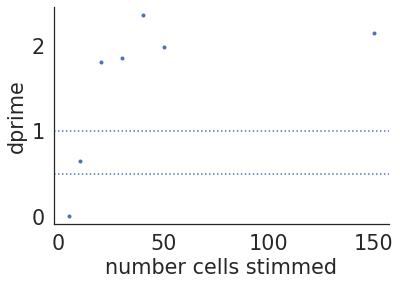

In [90]:
subset_dprimes = get_subset_dprime(run)
plt.plot([5,10,20,30,40,50,150], subset_dprimes, '.')
plt.xlabel("number cells stimmed")
plt.ylabel('dprime')
plt.ylim(min(subset_dprimes)-0.1, max(subset_dprimes)+0.1)

plt.axhline(0.5, linestyle=':')
plt.axhline(1, linestyle=':')
